__классификатор изображений на основе ResNet50__

Евгений Борисов borisov.e@solarl.ru

https://arxiv.org/pdf/1512.03385.pdf

In [1]:
import numpy as np
from os import listdir
from os.path import join as pjoin
from PIL import Image
from matplotlib import pyplot as plt

## модель

In [1]:
import tensorflow as tf
# tf.__version__

'2.4.1'

In [3]:
from tabulate import tabulate
from tensorflow.test import is_built_with_cuda
from tensorflow.python.client.device_lib import list_local_devices

def tf_info(tablefmt='html'):
    res = [
        ['tensorflow','%s'%(tf.__version__)],
        ['keras','%s'%(tf.keras.__version__)]
    ]

    if is_built_with_cuda():
        res.extend( [ 
              [ s.strip().split(': ') for s in d.physical_device_desc.split(',')  ]
               for d in list_local_devices() 
              if d.device_type == 'GPU' # and d.name==tf.test.gpu_device_name()
            ][0] )
            
    else:
        res.append(['','no CUDA support'])

    return tabulate( res, tablefmt=tablefmt )

tf_info()

tensorflow,2.4.1
keras,2.4.0
device,0
name,GeForce GTX 1060 6GB
pci bus id,0000:01:00.0
compute capability,6.1


In [4]:
# # default GPU device
# if tf.test.is_built_with_cuda():
#     print([ 
#           d.physical_device_desc 
#           for d in tf.python.client.device_lib.list_local_devices() 
#           if d.device_type == 'GPU' and d.name==tf.test.gpu_device_name()
#         ])

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model

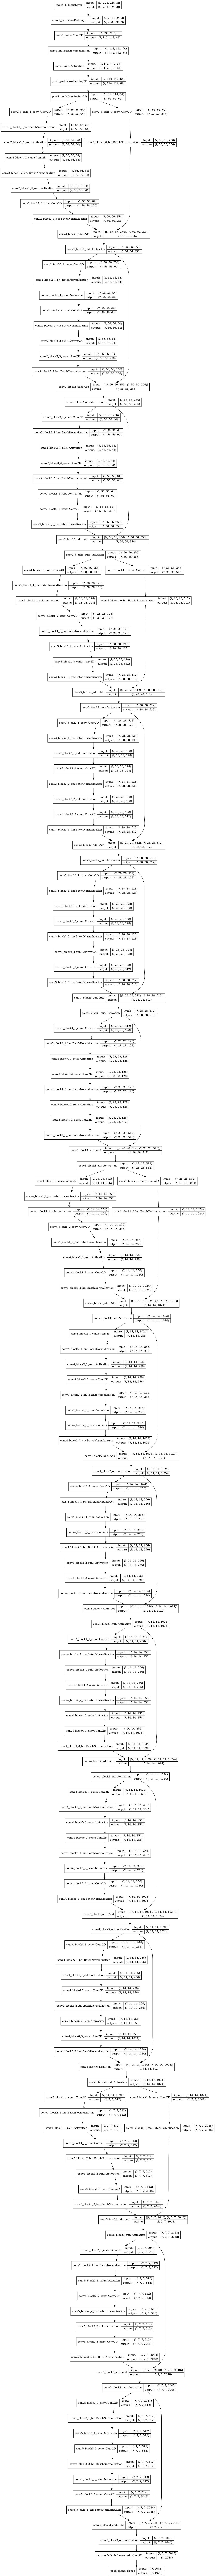

In [5]:
model = ResNet50(weights='data/imagenet/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
plot_model(model,to_file='resnet50.png', show_layer_names=True, show_shapes=True )

## тестируем

In [6]:
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a#file-imagenet1000_clsidx_to_labels-txt
with open('data/imagenet/imagenet1000_clsidx_to_labels.txt', 'rt') as f:  
    imagenet_labels = eval(f.read())

IMAGE_PATH='data/photos/'
files = [ pjoin(IMAGE_PATH,f) for f in listdir(IMAGE_PATH) if f.lower().split('.')[-1]=='jpg' ]

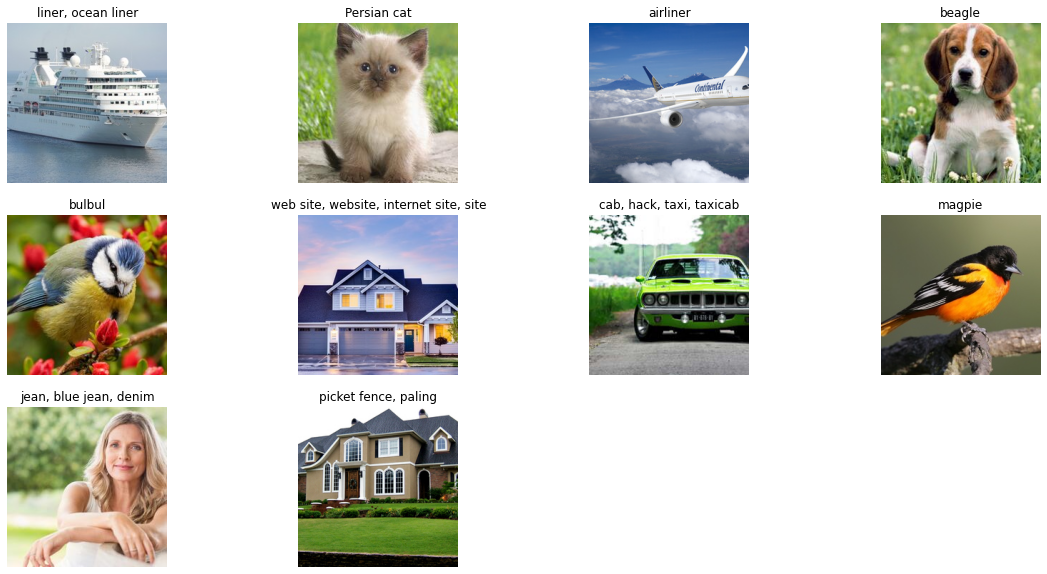

In [7]:
columns = 4

plt.figure(figsize=(20,10))

for n,f in enumerate(files):
    img = Image.open(f).resize([224,224,]) 
    X = np.array(img.convert('RGB')).astype(np.float32)[np.newaxis,:]
    r = model.predict(X)
    s = imagenet_labels[np.argmax(r)]

    plt.subplot( len(files)//columns+1, columns, n+1)
    plt.axis(False)
    plt.title(s)
    plt.imshow(img)

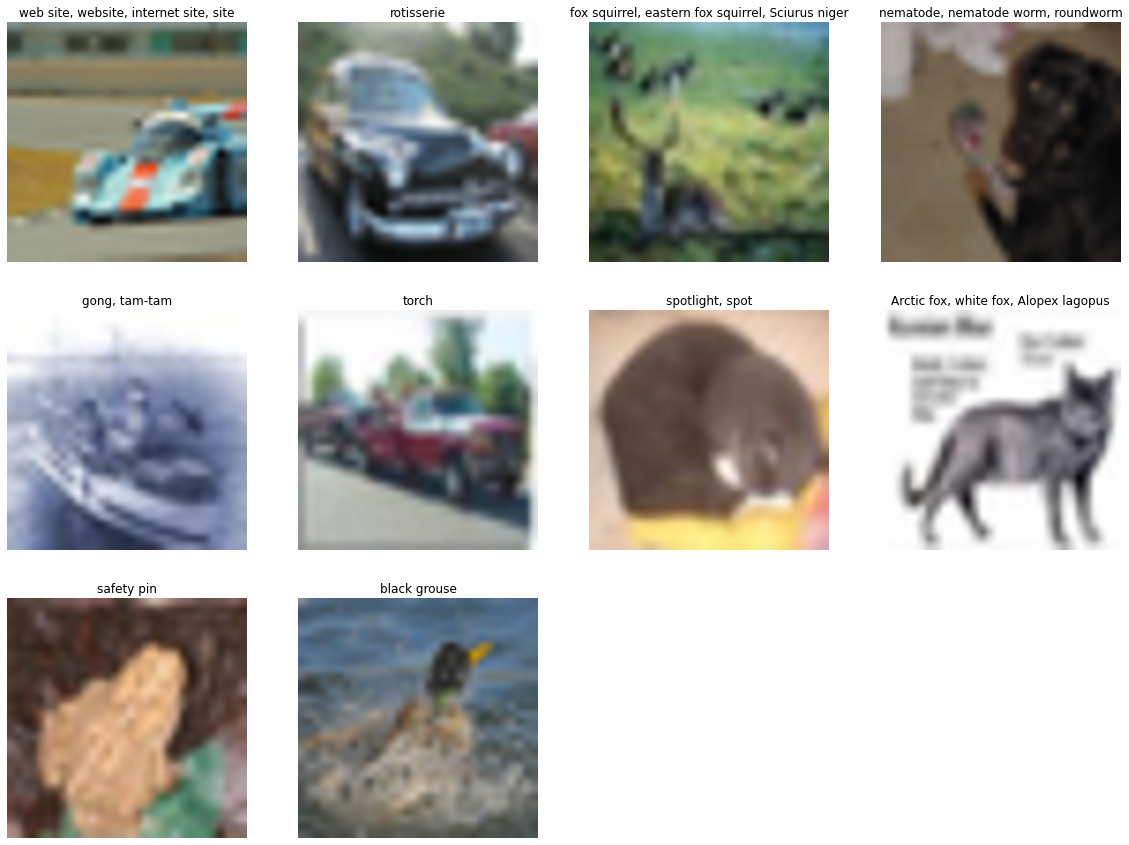

In [8]:
# cifar10 dataset.
# https://www.cs.toronto.edu/~kriz/cifar.html 

_, (x_test, _) = tf.keras.datasets.cifar10.load_data()

columns = 4
n_samples = 10
ii = np.random.permutation(x_test.shape[0])[:n_samples]

plt.figure(figsize=(5*columns,5*(n_samples//columns+1)))

for n,x in enumerate(x_test[ii]):
    img = Image.fromarray(x).resize([224,224,]) 
    X = np.array(img.convert('RGB')).astype(np.float32)[np.newaxis,:]
    r = model.predict(X)
    s = imagenet_labels[np.argmax(r)]

    plt.subplot( n_samples//columns+1, columns, n+1)
    plt.axis(False)
    plt.title(s)
    plt.imshow(img)